# Assignment 4: Variational Autoencoders

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

## Exercise 1: Derivation of ELBO

Prove the evidence lower bound (ELBO), which states that 
\begin{align*}
    \mathbb E_{q(z \mid x)}[\log \frac{p(x, z)}{q(z \mid x)}] \leq \log p(x),
\end{align*}
for some distributions $q(z \mid x), p(x, z), p(x)$. 

########## YOUR SOLUTION HERE ##########

For this task the Jensen's inequality can be used, which applies to expectations of concave functions. The inequality states that for any concave function $f$ and random variable $X$ the relation is:

$$
\mathbb{E}[f(X)] \leq f(\mathbb{E}[X]).
$$

Starting from the RHS, the marginal likelihood $\log p(x)$ can be expressed using the law of total probability integrated over the latent variable $z$:

$$
\log p(x) = \log \int p(x, z) dz.
$$

Now, we introduce the distribution $q(z \mid x)$, which is a variational distribution approximating the true posterior $p(z \mid x)$. We can rewrite the marginal likelihood by multiplying and dividing by this variational distribution:

$$
\log p(x) = \log \int \frac{p(x, z)}{q(z \mid x)} q(z \mid x) dz.
$$

Applying Jensen's inequality to the logarithm over the expectation with respect to $q(z \mid x)$ gives:

$$
\log p(x) = \log \int \frac{p(x, z)}{q(z \mid x)} q(z \mid x) dz \geq \int q(z \mid x) \log \frac{p(x, z)}{q(z \mid x)} dz.
$$

The step using Jensen's inequality is:

$$
\log \left( \int q(z \mid x) \frac{p(x, z)}{q(z \mid x)} dz \right) \geq \int q(z \mid x) \log \frac{p(x, z)}{q(z \mid x)} dz.
$$

Hence, we have:

$$
\log p(x) \geq \mathbb{E}_{q(z \mid x)}[\log \frac{p(x, z)}{q(z \mid x)}].
$$

This shows that:

$$
\mathbb{E}_{q(z \mid x)}[\log \frac{p(x, z)}{q(z \mid x)}] \leq \log p(x),
$$

## Exercise 2: Decomposition of ELBO

We have the observable variable $x$ and the latent variable $z$. 
We can observe $x$ only through a dataset $\mathcal D$. 
For $z$, we choose the prior $p(z) = \mathcal N(0, 1)$ and the posterior (or encoder) distribution $q(z \mid x) = \mathcal N(\mu(x), \sigma^2(x))$, where $\mu(x)$ and $\sigma^2(x)$ are neural networks with shared parameters, i.e., $(\mu(x), \sigma^2(x)) = \text{encode}(x)$. 
This makes $q(z \mid x)$ easy to sample from. 
Subsequently, we can use the decoder $p(x \mid z)$ to reconstruct $x$. 

There are several interpretations as to why the maximization of the ELBO is a suitable objective for VAEs. 
To obtain one of them, prove the following identity 
\begin{align*}
    \mathbb E_{q(z \mid x)}[\log \frac{p(x, z)}{q(z \mid x)}] = \mathbb E_{q(z \mid x)}[\log p(x \mid z)] - D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z))
\end{align*}
where $D_{\text{KL}}$ denotes the Kullback-Leibler divergence. 

########## YOUR SOLUTION HERE ##########

Let's start by expanding the left-hand side using the definition of the joint distribution $p(x, z) = p(x \mid z) p(z)$:

$$
\mathbb{E}_{q(z \mid x)}[\log \frac{p(x, z)}{q(z \mid x)}] = \mathbb{E}_{q(z \mid x)}[\log \frac{p(x \mid z) p(z)}{q(z \mid x)}].
$$

Using the logarithm properties and splitting into two expectations, this can be rewritten as:

$$
\mathbb{E}_{q(z \mid x)}[\log p(x \mid z) + \log p(z) - \log q(z \mid x)] = \mathbb{E}_{q(z \mid x)}[\log p(x \mid z)] + \mathbb{E}_{q(z \mid x)}[\log p(z) - \log q(z \mid x)].
$$

The second expectation term is the definition of the Kullback-Leibler divergence between $q(z \mid x)$ and $p(z)$:

$$
\mathbb{E}_{q(z \mid x)}[\log p(z) - \log q(z \mid x)] = -D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z)).
$$

Thus, combining these terms, we obtain the required identity:

$$
\mathbb{E}_{q(z \mid x)}[\log \frac{p(x, z)}{q(z \mid x)}] = \mathbb{E}_{q(z \mid x)}[\log p(x \mid z)] - D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z)).
$$

## Exercise 3: Reconstruction Term

The first term on the right-hand side of above equation is called the *reconstruction term*. 
To see why, analyze it under the expectation over $x$. 
To be more clear, let us denote the reconstruction of $x$ by the VAE as $\tilde x$. 
Prove the identity
\begin{align*}
    \mathbb{E}_{p(x)} [\mathbb{E}_{q(z \mid x)}[\log p(\tilde x \mid z)]] = - \mathcal H(p(x \mid z)) - \mathbb E_{p(z)}[D_{\text{KL}}(p(x \mid z) \mathbin{||} p(\tilde x \mid z)))].
\end{align*}
Which effects does the maximization of the reconstruction term have on the different parts of the VAE?
That is, interpret the two terms on the right-hand side in the context of VAE training. 

########## YOUR SOLUTION HERE ##########

##### Step 1: Proof

Considering the decomposition of entropy $\mathcal{H}$ and divergence $D_{\text{KL}}$ terms:
$$
\log p(\tilde x \mid z) = \log p(x \mid z) - (\log p(x \mid z) - \log p(\tilde x \mid z)),
$$

which implies:
$$
\log p(\tilde x \mid z) = \log p(x \mid z) - D_{\text{KL}}(p(x \mid z) \mathbin{||} p(\tilde x \mid z)).
$$

Taking the expectations:
$$
\mathbb{E}_{p(x)} [\mathbb{E}_{q(z \mid x)}[\log p(\tilde x \mid z)]] = \mathbb{E}_{p(x)} [\mathbb{E}_{q(z \mid x)}[\log p(x \mid z)]] - \mathbb{E}_{p(x)} [\mathbb{E}_{q(z \mid x)}[D_{\text{KL}}(p(x \mid z) \mathbin{||} p(\tilde x \mid z))]].
$$

The first term $\mathbb{E}_{p(x)} [\mathbb{E}_{q(z \mid x)}[\log p(x \mid z)]]$ can be interpreted as the negative of the conditional entropy, $ - \mathcal H(p(x \mid z))$.

The second term can be expressed under the expectation of $p(z)$ since $q(z \mid x)$ approximately integrates over $p(x)$ to represent the marginal $p(z)$. Thus, it becomes:
$$
- \mathbb E_{p(z)}[D_{\text{KL}}(p(x \mid z) \mathbin{||} p(\tilde x \mid z)))].
$$

## Exercise 4: Regularization Term

The second term of the decomposition of the ELBO is a regularization term. 
Again, we analyze it under the expectation over $x$. 
Prove that 
\begin{align*}
    \mathbb E_{p(x)}[D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z))] = I(x, z),
\end{align*}
where $I(\cdot, \cdot)$ denotes mutual information. 
For each side of this identity, give a different interpretation of the imposed regularization. 

########## YOUR SOLUTION HERE ##########

##### Step 1: Definition of Terms

The Kullback-Leibler divergence from the posterior $q(z \mid x)$ to the prior $p(z)$ is defined as:

$$
D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z)) = \int q(z \mid x) \log \frac{q(z \mid x)}{p(z)} \, dz.
$$

Mutual information between $x$ and $z$, $I(x, z)$, measures the reduction in uncertainty about $z$ due to the knowledge of $x$ (and vice versa) and is defined as:

$$
I(x, z) = \mathbb{E}_{p(x, z)} \left[ \log \frac{p(z \mid x)}{p(z)} \right].
$$

##### Step 2: Relating the Terms

Considering and expanding the expression for mutual information:

$$
I(x, z) = \int p(x, z) \log \frac{p(z \mid x)}{p(z)} \, dx \, dz.
$$

Since $p(z \mid x)$ is not directly accessible and we use $q(z \mid x)$ as an approximation $\log \frac{p(z \mid x)}{p(z)} = \log \frac{q(z \mid x)}{p(z)} + \log \frac{p(z \mid x)}{q(z \mid x)}$, we rewrite the mutual information:

$$
I(x, z) = \mathbb{E}_{p(x)} \left[ \int q(z \mid x) \log \frac{q(z \mid x)}{p(z)} \, dz \right] + \mathbb{E}_{p(x)} \left[ \int q(z \mid x) \log \frac{p(z \mid x)}{q(z \mid x)} \, dz \right].
$$

The first term in the above expansion is exactly $\mathbb{E}_{p(x)}[D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z))]$. The second term, due to the property that $\mathbb{E}_{q(z \mid x)}[\log \frac{p(z \mid x)}{q(z \mid x)}] = -D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z \mid x))$ and expected KL-divergence being non-negative, simplifies:

$$
\mathbb{E}_{p(x)} \left[ \int q(z \mid x) \log \frac{p(z \mid x)}{q(z \mid x)} \, dz \right] = 0.
$$

Thus

$$
\mathbb{E}_{p(x)}[D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z))] = I(x, z).
$$

##### Step 3: Interpretation of the Regularization Term

**1. Mutual Information Perspective:**
The mutual information $I(x, z)$ high indicates that the latent variables $z$ retain a lot of information about the input $x$. Maximizing this mutual information, thus, ensures that the latent space captures meaningful and relevant features of the data.

**2. KL Divergence Perspective:**
Minimizing the KL divergence between $q(z \mid x)$ and $p(z)$ acts as a regularizer by encouraging the posterior distribution to be close to the prior distribution. This regularization prevents the model from "overfitting" to the particularities of the training data in its encoded representations. Essentially, it helps in generalizing better 

## Exercise 5: Derivation of Decoder Loss Function

Our considerations of the ELBO so far were somewhat abstract. 
In this exercise we will derive a concrete loss function that is ready for implementation. 
To this end, revisit the decomposition of the ELBO from exercise 2. 
We will use a softmax function on the decoder output to parameterize $p(x \mid z)$ as a categorical distribution with $k$ categories. 
We denote the softmax-activated decoder output as $\sigma(z)_i, i \in \{1, \dots, k\}$. 
Prove that under these assumptions 
\begin{align*}
    \log p(x \mid z) = x \log \sigma(z)_x.
\end{align*}
How do we obtain the expectation under $q(z \mid x)$?
Note that in practice $x$ will be a vector and we will use 
\begin{align*}
    \log p(x_1, \dots, x_d \mid z) = \sum_{j=1}^d x_j \log \sigma(z)_{x_j}.
\end{align*}
Which assumption is implied in this identity? 
Is it justified?

Since we maximize the ELBO, our loss function will be 
\begin{align*}
    \mathcal L_{\text{decoder}} = -\sum_{j=1}^d x_j \log \sigma(z)_{x_j}.
\end{align*}
Thus, we can just use the familiar cross-entropy loss function. 

*Note that we used $\sigma^2(x)$ as one of the outputs of the encoder. Here, $\sigma(x)$ denotes the softmax-activated decoder output. So you should read the square more as a part of the name than an operation.*

########## YOUR SOLUTION HERE ##########

##### 1. Proving the Log Probability Identity
Considering the softmax function outputs $\sigma(z)_i$ for each category $k$, and assuming $x$ is a one-hot encoded vector representing the actual category, then $x_i = 1$ for the correct category $i$ and 0 otherwise. Therefore, the probability $p(x \mid z)$ for the given category can be defined as:
$$
p(x \mid z) = \prod_{i=1}^k [\sigma(z)_i]^{x_i}
$$

Here, $\sigma(z)_i$ is the probability of the category $i$, given the latent variable $z$. Taking the logarithm, we get:
$$
\log p(x \mid z) = \log \prod_{i=1}^k [\sigma(z)_i]^{x_i} = \sum_{i=1}^k x_i \log \sigma(z)_i
$$
In the special case where $x$ corresponds to a single category, $x$ is a single scalar:
$$
\log p(x \mid z) = x \log \sigma(z)_x
$$
This simplifies to:
$$
\log p(x \mid z) = \log \sigma(z)_x \quad (\text{as } x \text{ is 1 for the correct category and 0 otherwise})
$$

##### 2. Expectation under $q(z \mid x)$
The expectation of $\log p(x \mid z)$ under the variational distribution $q(z \mid x)$ is used in the ELBO calculation and can be computed as:
$$
\mathbb{E}_{q(z \mid x)}[\log p(x \mid z)]
$$

##### 3. Extension to Vectors and Cross-Entropy
When $x$ is a vector, the probability of the entire vector $x$ given $z$ is expressed as:
$$
\log p(x_1, \dots, x_d \mid z) = \sum_{j=1}^d x_j \log \sigma(z)_{x_j}
$$

##### 4. Loss-function
In practice, the loss function:
$$
\mathcal L_{\text{decoder}} = -\sum_{j=1}^d x_j \log \sigma(z)_{x_j}
$$
is the cross-entropy loss between the predicted probabilities (softmax outputs) and the true labels (one-hot encoded vector $x$).

## Exercise 6: Derivation of Encoder Loss Function

Prove that the encoder loss function derived from the ELBO is 
\begin{align*}
    \mathcal L_{encoder} = D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z)) = \frac12 (\mu^2(x) + \sigma^2(x) - \log \sigma^2(x) - 1).
\end{align*}
Interpret this result. 

########## YOUR SOLUTION HERE ##########

##### Step 1: KL Divergence Between Two Gaussians

The Kullback-Leibler divergence between two Gaussian distributions $q(z \mid x) = \mathcal{N}(\mu(x), \sigma^2(x))$ and $p(z) = \mathcal{N}(0, 1)$ is computed as:

$$
D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z)) = \int q(z \mid x) \log \frac{q(z \mid x)}{p(z)} \, dz.
$$

For Gaussian distributions, this expression simplifies to:

$$
D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z)) = \frac{1}{2} \left[ \frac{\sigma^2(x)}{1} + \frac{(\mu(x) - 0)^2}{1} - 1 - \log \frac{\sigma^2(x)}{1} \right].
$$

Simplifying, we obtain:

$$
D_{\text{KL}}(q(z \mid x) \mathbin{||} p(z)) = \frac{1}{2} \left[ \sigma^2(x) + \mu^2(x) - 1 - \log \sigma^2(x) \right].
$$

##### Step 2: Derivation of the Encoder Loss Function

Goal: encouraging the posterior distribution $q(z \mid x)$ to be as close as possible to the prior distribution $p(z)$. 
Thus, the encoder loss function derived from the ELBO, represented as $\mathcal{L}_{encoder}$, is:

$$
\mathcal{L}_{encoder} = \frac{1}{2} \left[ \mu^2(x) + \sigma^2(x) - \log \sigma^2(x) - 1 \right].
$$

##### Interpretation

1. **Minimizing $\mu^2(x)$**: This term encourages the mean of the encoded latent variables to be close to zero, aligning with the zero mean of the standard normal prior.

2. **Minimizing $\sigma^2(x)$**: By penalizing large values of $\sigma^2(x)$, the encoder is encouraged to reduce the variance of the encoded latent variables.

3. **Maximizing $\log \sigma^2(x)$**: This term acts as a counterbalance to the minimization of $\sigma^2(x)$, preventing the variance from collapsing to extremely small values.

4. **Constant $-1$**: This constant term ensures that when $\mu(x)$ and $\sigma^2(x)$ are close to the priors (i.e., 0 and 1, respectively), the KL divergence reaches its minimum possible value, indicating no divergence between $q(z \mid x)$ and $p(z)$.

## Exercise 7: Reparametrization Trick

We are almost ready to implement our VAE. 
There remains only one small problem to solve. 
That is, passing down gradients from the decoder to the encoder is not possible due to the sampling step between them, i.e., drawing $z \sim \mathcal N(\mu(x), \sigma^2(x))$. 
This sampling step introduces a discontinuity which we cannot differentiate. 
Luckily, there is a simple solution for that. 
We sample a different random variable $\varepsilon \sim \mathcal N(0, 1)$ and define $z = g(\varepsilon, \mu(x), \sigma^2(x))$ via a deterministic function $g$. 
This is known as the *reparameterization trick*. 
What form must $g$ have? 
How does it resolve the discontinuity problem? 
Argue why $g(\varepsilon, \mu(x), \sigma^2(x))$ and $\varepsilon$ have the same distribution only with different moments. 

########## YOUR SOLUTION HERE ##########

##### Step 1: Defining the Function $g$

Defining a random variable $\varepsilon \sim \mathcal{N}(0, 1)$ and express $z$ as a deterministic function of $\varepsilon$, $\mu(x)$, and $\sigma^2(x)$. The function $g$ is defined as:

$$
z = g(\varepsilon, \mu(x), \sigma^2(x)) = \mu(x) + \sigma(x) \cdot \varepsilon.
$$

Here, $g$ transforms a standard normal variable $\varepsilon$ into the desired distribution $\mathcal{N}(\mu(x), \sigma^2(x))$ using the mean and standard deviation obtained from the encoder.

##### Step 2: Resolving the Discontinuity Problem

By reparameterizing $z$ using $\varepsilon$, we turn the sampling into a deterministic transformation and it is possible to evaluate the gradients wrt the parameters of the encoder, $\mu(x)$ and $\sigma(x)$, during backpropagation. The encoder parameters are thus updated to minimize the loss without being blocked by the sampling step.

##### Step 3: Distribution of $g(\varepsilon, \mu(x), \sigma^2(x))$

- **Mean of $z$**:
  $$
  \mathbb{E}[z] = \mathbb{E}[\mu(x) + \sigma(x) \cdot \varepsilon] = \mu(x) + \sigma(x) \cdot \mathbb{E}[\varepsilon] = \mu(x) + \sigma(x) \cdot 0 = \mu(x).
  $$

- **Variance of $z$**:
  $$
  \text{Var}(z) = \text{Var}(\mu(x) + \sigma(x) \cdot \varepsilon) = \text{Var}(\sigma(x) \cdot \varepsilon) = \sigma(x)^2 \cdot \text{Var}(\varepsilon) = \sigma(x)^2 \cdot 1 = \sigma(x)^2.
  $$

Thus, $z$ is distributed according to $\mathcal{N}(\mu(x), \sigma^2(x))$, as required.

## Exercise 8: VAE Training

Below you find a convolutional autoencoder architecture and a CIFAR-10 dataloader along with a few hyperparameters that should work quite well for this setting. 
Implement a training loop that features the reparametrization trick and maximizes the ELBO as derived in the previous exercises. 
Visualize the training progress. 

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Train Loss: 1409.0037
Epoch 1, Validation Loss: 518.2545
Epoch 2, Train Loss: 226.3799
Epoch 2, Validation Loss: 70.7109
Epoch 3, Train Loss: 35.2727
Epoch 3, Validation Loss: 22.6524
Epoch 4, Train Loss: 22.5649
Epoch 4, Validation Loss: 19.3093
Epoch 5, Train Loss: 20.6102
Epoch 5, Validation Loss: 17.7615
Epoch 6, Train Loss: 19.1412
Epoch 6, Validation Loss: 16.2370
Epoch 7, Train Loss: 17.8881
Epoch 7, Validation Loss: 15.1817
Epoch 8, Train Loss: 17.0706
Epoch 8, Validation Loss: 14.3563
Epoch 9, Train Loss: 16.2345
Epoch 9, Validation Loss: 13.6754
Epoch 10, Train Loss: 15.6979
Epoch 10, Validation Loss: 13.0704


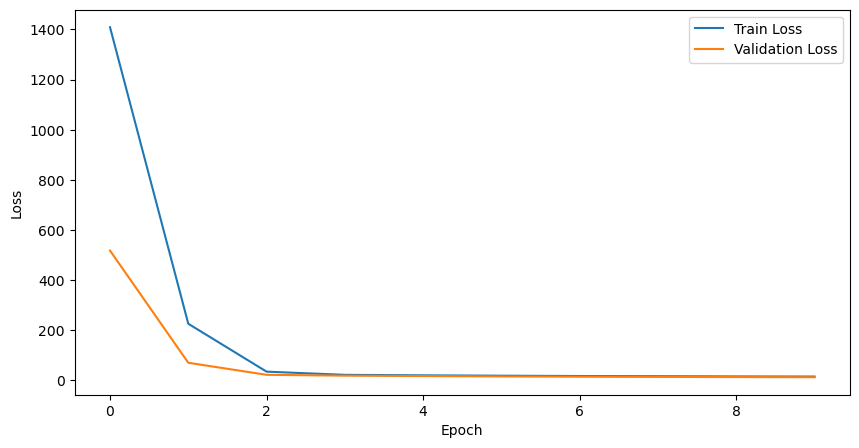

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from itertools import chain

# architecture and hyperparams roughly from https://github.com/SashaMalysheva/Pytorch-VAE
batch_size = 32
epochs = 10
lr = 3e-04
weight_decay = 1e-5
kld_weight = 1e-4 # use this weigh down the KLD term against the reconstruction term

# Check if CUDA is available and set device accordingly
device = 'cuda' if torch.cuda.is_available() else 'cpu'

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 4, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.fc = nn.Linear(256 * 2 * 2, 256 * 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.fc(x.flatten(1))
        return x

class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(256, 256 * 2 * 2)
        self.bn = nn.BatchNorm1d(256 * 2 * 2)
        self.deconv1 = nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.deconv2 = nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.deconv3 = nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.deconv4 = nn.ConvTranspose2d(32, 3, 4, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(3)

    def forward(self, x):
        x = self.fc(x)
        x = x.reshape(x.size(0), 256, 2, 2)
        x = F.relu(self.bn1(self.deconv1(x)))
        x = F.relu(self.bn2(self.deconv2(x)))
        x = F.relu(self.bn3(self.deconv3(x)))
        x = self.bn4(self.deconv4(x))
        return x

encoder = Encoder()
decoder = Decoder()
params = chain(encoder.parameters(), decoder.parameters())
optimizer = torch.optim.Adam(params, lr=lr, weight_decay=weight_decay)

########## YOUR SOLUTION HERE ##########

# Reparameterization trick
def reparameterize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

# Loss function
def loss_function(recon_x, x, mu, logvar):
    # Reconstruction loss
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    # KL divergence
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kld_weight * kld, recon_loss, kld


# Training loop
train_losses = []
val_losses = []

for epoch in range(epochs):
    encoder.train()
    decoder.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(trainloader):
        data = data.to(device)
        optimizer.zero_grad()
        enc_out = encoder(data)
        mu = enc_out[:, :256]
        logvar = enc_out[:, 256:]
        z = reparameterize(mu, logvar)
        recon_data = decoder(z)
        loss, recon_loss, kld = loss_function(recon_data, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    train_loss /= len(trainloader.dataset)
    train_losses.append(train_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}')

    encoder.eval()
    decoder.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(testloader):
            data = data.to(device)
            enc_out = encoder(data)
            mu = enc_out[:, :256]
            logvar = enc_out[:, 256:]
            z = reparameterize(mu, logvar)
            recon_data = decoder(z)
            loss, _, _ = loss_function(recon_data, data, mu, logvar)
            val_loss += loss.item()
    
    val_loss /= len(testloader.dataset)
    val_losses.append(val_loss)
    print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.4f}')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize
encoder.eval()
decoder.eval()
with torch.no_grad():
    for batch_idx, (data, _) in enumerate(testloader):
        data = data.to(device)
        enc_out = encoder(data)
        mu = enc_out[:, :256]
        logvar = enc_out[:, 256:]
        z = reparameterize(mu, logvar)
        recon_data = decoder(z)
        break

data = data.cpu().numpy()
recon_data = recon_data.cpu().numpy()

## Exercise 9: VAE Inference

Visualize some reconstruction examples from both training and test set. 
You can use the provided function `imshow` that expects a rank-2 tensor with values in $[-1, 1]$. 
Moreover, since the latent variables $z$ have the simple distribution $\mathcal N(0, I)$, we can easily generate new samples from the training distribution by sampling $z$ and feeding it to the decoder. 
Discuss your results! 

Test Set Reconstructions


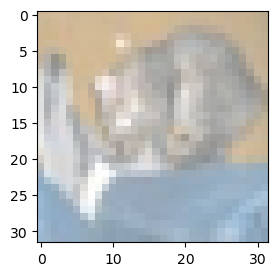

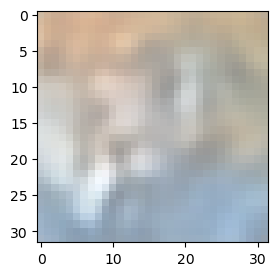

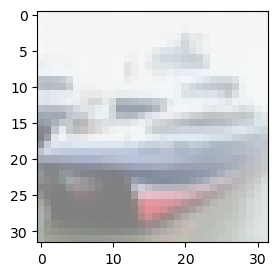

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


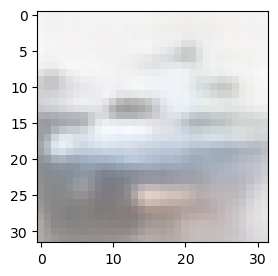

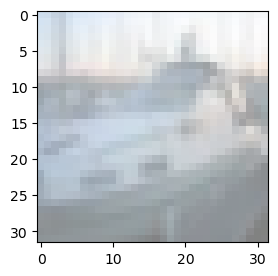

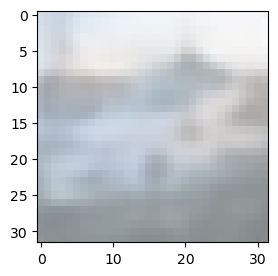

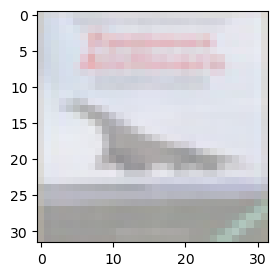

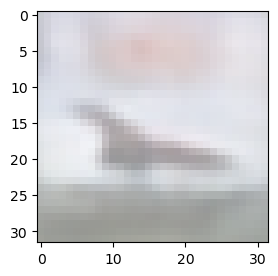

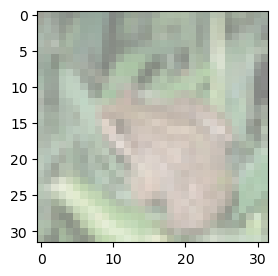

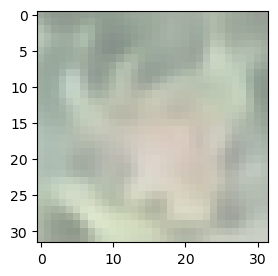

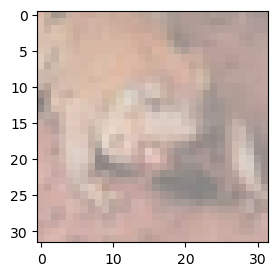

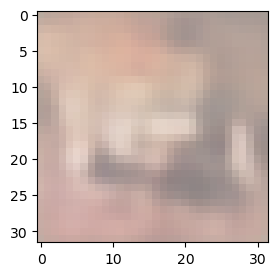

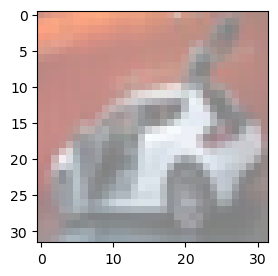

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


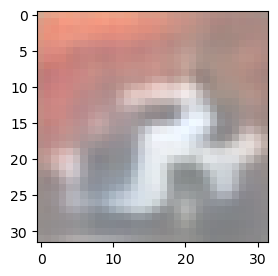

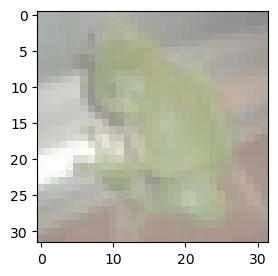

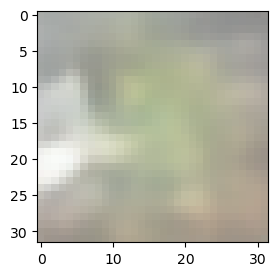

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Generated Samples


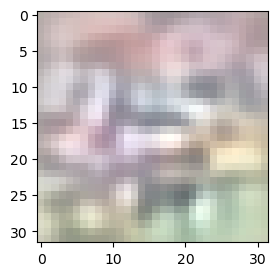

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


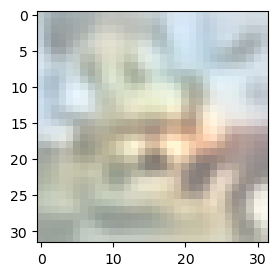

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


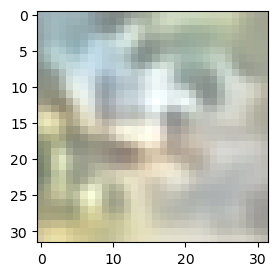

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


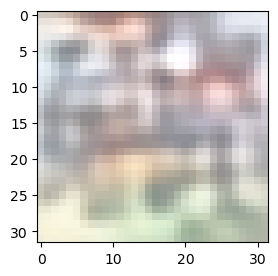

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


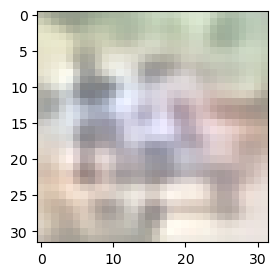

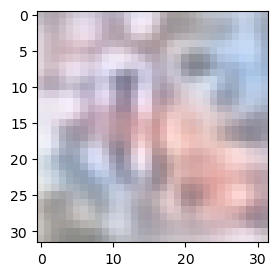

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


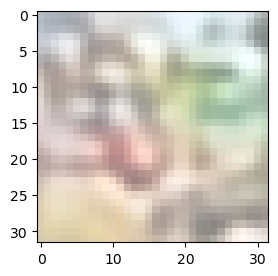

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


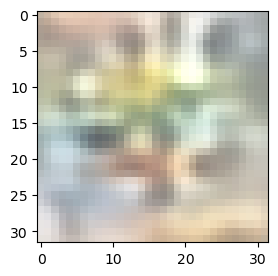

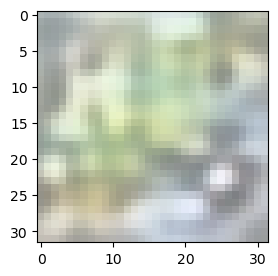

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


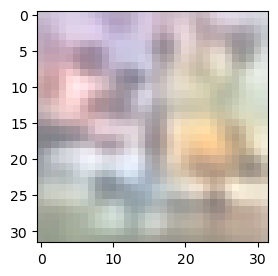

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


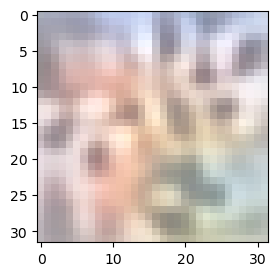

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


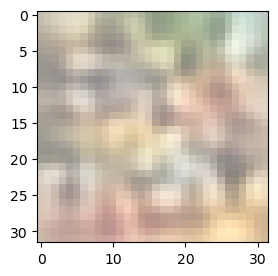

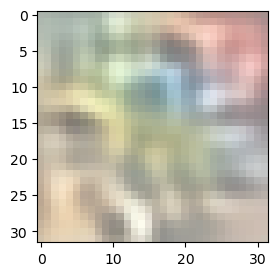

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


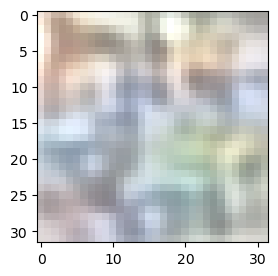

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


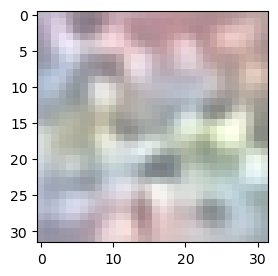

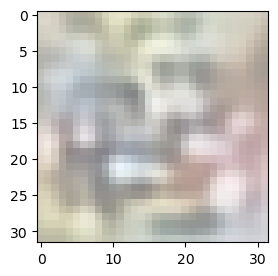

In [2]:
def imshow(img):
    img = img / 2 + 0.5 # img in [-1, 1]
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()

########## YOUR SOLUTION HERE ##########

# Visualize reconstructions
encoder.eval()
decoder.eval()
with torch.no_grad():
    for batch_idx, (data, _) in enumerate(testloader):
        data = data.to(device)
        enc_out = encoder(data)
        mu = enc_out[:, :256]
        logvar = enc_out[:, 256:]
        z = reparameterize(mu, logvar)
        recon_data = decoder(z)
        break

data = data.cpu()
recon_data = recon_data.cpu()

print("Test Set Reconstructions")
for i in range(8):
    plt.figure(figsize=(3, 3))  # Define a new figure for each image
    imshow(data[i])
    plt.figure(figsize=(3, 3))  # Define a new figure for each reconstructed image
    imshow(recon_data[i])

# Generate new samples by sampling from the latent space
with torch.no_grad():
    z = torch.randn(16, 256).to(device)  # Sample from standard normal distribution
    generated_data = decoder(z).cpu()

print("Generated Samples")
for i in range(16):
    plt.figure(figsize=(3, 3))  # Define a new figure for each generated image
    imshow(generated_data[i])